In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
gpu_data_path = "D:/Python Projects/Computer Hardware Analysis/data/GPUData.csv"
gpu = pd.read_csv(gpu_data_path, na_values=[" ", "", "MHz"])
gpu = gpu[['Name', 'Producer', 'HDMI', 'Boost Clock', 'Vram', 'Memory Clock']]
gpu.head

<bound method NDFrame.head of                                              Name  Producer  HDMI Boost Clock  \
0            Sapphire Pulse Radeon RX 6600 Gaming  SAPPHIRE     1    2044 MHz   
1                           Aorus RTX 3070 Master  Gigabyte     3    1845 MHz   
2                 ASRock Arc A750 Challenger D OC    ASRock     2    2250 MHz   
3            ASRock Radeon RX 7600 Challenger 8GO    ASRock     1    2695 MHz   
4        ASRock Radeon RX 7600 Phantom Gaming 8GO    ASRock     1    2755 MHz   
...                                           ...       ...   ...         ...   
1412       ZOTAC GeForce GTX 1080 Ti Arctic Storm     ZOTAC     1    1620 MHz   
1413  ZOTAC GeForce GTX 1080 Ti Arctic Storm Mini     ZOTAC     0    1620 MHz   
1414             ZOTAC GeForce GTX 1080 Ti Blower     ZOTAC     0    1582 MHz   
1415   ZOTAC GeForce GTX 1080 Ti Founders Edition     ZOTAC     1    1582 MHz   
1416               ZOTAC GeForce GTX 1080 Ti Mini     ZOTAC     0    1620 MHz  

In [9]:
# Load the CPU data file
cpu_data_path ="D:/Python Projects/Computer Hardware Analysis/data/CPUData.csv"
cpu = pd.read_csv(cpu_data_path, na_values=[" ", "", "GHz"])
cpu = cpu[['Name', 'Price', 'Producer', 'MPN', 'EAN', 'UPC', 'Base Clock', 'Turbo Clock', 'Unlocked Multiplier', 'Cores', 'Threads', 'TDP', 'Socket', 'Integrated GPU', 'Product Page']]
cpu.head

<bound method NDFrame.head of                       Name        Price Producer               MPN  \
0        AMD Ryzen 5 5600X  $158.86 USD      AMD  100-100000065BOX   
1         AMD Athlon 3000G   $53.22 USD      AMD     YD3000C6FHBOX   
2        AMD Ryzen 3 3300X  $150.09 USD      AMD  100-100000159BOX   
3         AMD Ryzen 5 5500   $87.04 USD      AMD  100-100000457BOX   
4         AMD Ryzen 5 5600  $133.46 USD      AMD  100-100000927BOX   
..                     ...          ...      ...               ...   
323  Intel Xeon E5-2690 V4          NaN    Intel   BX80660E52690V4   
324  Intel Xeon E5-2695 V3          NaN    Intel   BX80644E52695V3   
325  Intel Xeon E5-2695 V4          NaN    Intel   BX80660E52695V4   
326  Intel Xeon E5-2697 V3          NaN    Intel   BX80644E52697V3   
327  Intel Xeon E5-2697 V4          NaN    Intel   BX80660E52697V4   

               EAN           UPC Base Clock Turbo Clock  Unlocked Multiplier  \
0     730143312042           NaN    3.7 GHz     4

In [11]:

cpu = cpu.dropna(subset=['Base Clock'])
cpu['Cores'] = cpu['Cores'].replace(0, 10)
cpu['base_clock'] = cpu['Base Clock'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
cpu['turbo_clock'] = cpu['Turbo Clock'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
cpu['tdp'] = cpu['TDP'].str.extract(r'(\d+\.\d+|\d+)').astype(float)


In [12]:
# Cleaning and preprocessing GPU data
gpu['memory_clock'] = gpu['Memory Clock'].str.extract(r'(\d+)').astype(float)
gpu['boost_clock'] = gpu['Boost Clock'].str.extract(r'(\d+)').astype(float)


C:\Users\chill\AppData\Local\Temp\ipykernel_14880\737507794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cpu, x='Producer', palette=['#ED1C24', '#00C7FD'])


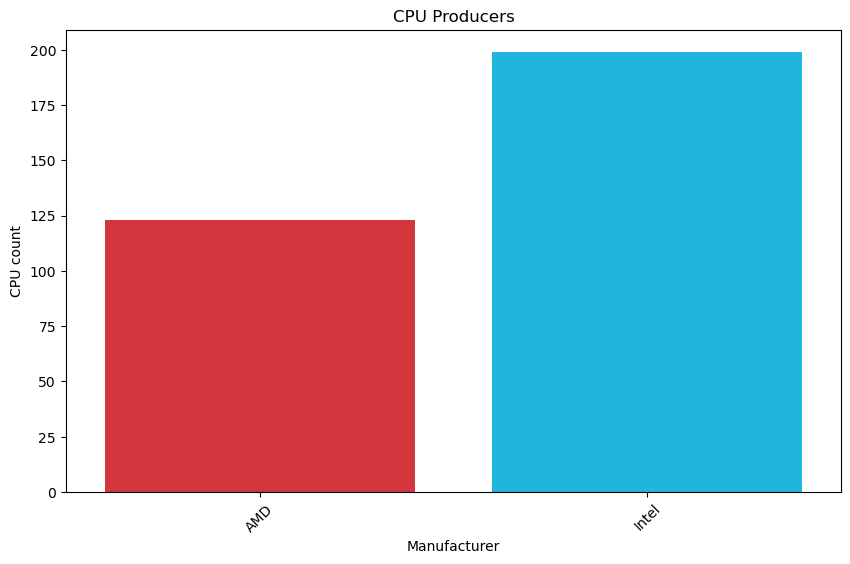

In [13]:
# Plotting CPU producers
plt.figure(figsize=(10, 6))
sns.countplot(data=cpu, x='Producer', palette=['#ED1C24', '#00C7FD'])
plt.title("CPU Producers")
plt.xlabel("Manufacturer")
plt.ylabel("CPU count")
plt.xticks(rotation=45)
plt.show()

C:\Users\chill\AppData\Local\Temp\ipykernel_14880\1076831013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cpu, x='Producer', y='base_clock', palette=['#ED1C24', '#00C7FD'])


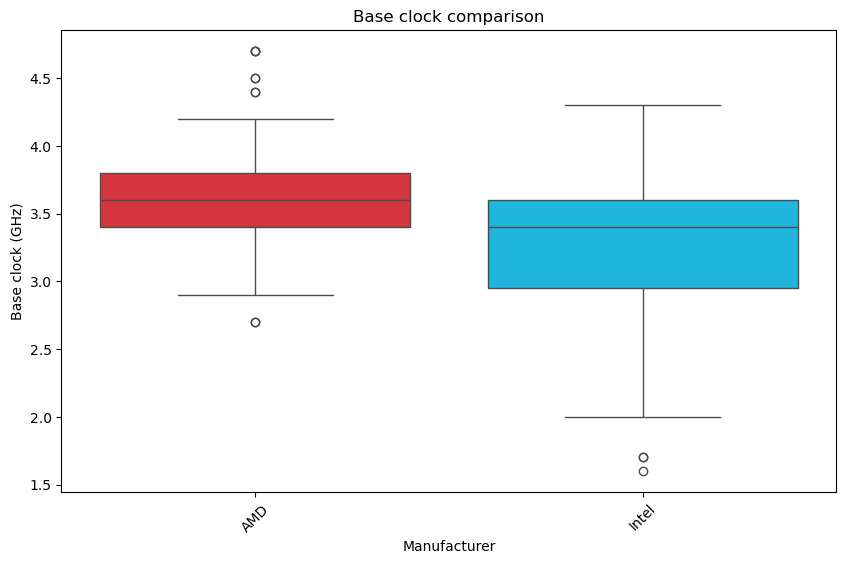

In [14]:
# Plotting base clock speeds on box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cpu, x='Producer', y='base_clock', palette=['#ED1C24', '#00C7FD'])
plt.title("Base clock comparison")
plt.xlabel("Manufacturer")
plt.ylabel("Base clock (GHz)")
plt.xticks(rotation=45)
plt.show()

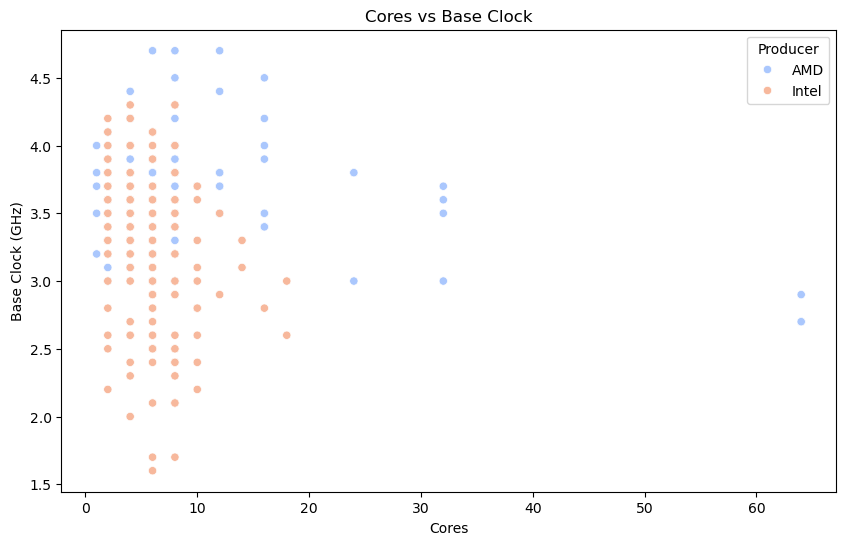

In [15]:
# Scatter plot comparing cores to base clock speeds
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cpu, x='Cores', y='base_clock', hue='Producer', palette='coolwarm')
plt.title("Cores vs Base Clock")
plt.xlabel("Cores")
plt.ylabel("Base Clock (GHz)")
plt.legend(title='Producer', loc='upper right')
plt.show()


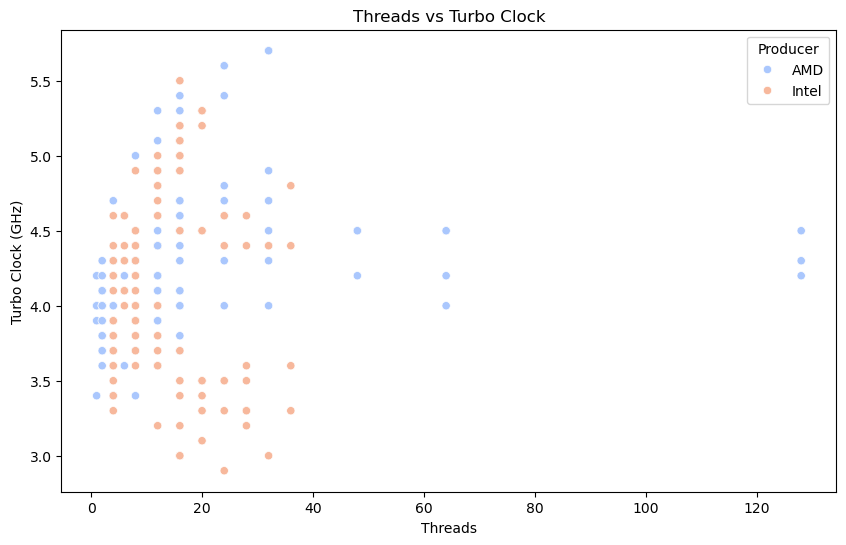

In [16]:
# Scatter plot comparing threads to turbo clock speeds
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cpu, x='Threads', y='turbo_clock', hue='Producer', palette='coolwarm')
plt.title("Threads vs Turbo Clock")
plt.xlabel("Threads")
plt.ylabel("Turbo Clock (GHz)")
plt.legend(title='Producer', loc='upper right')
plt.show()


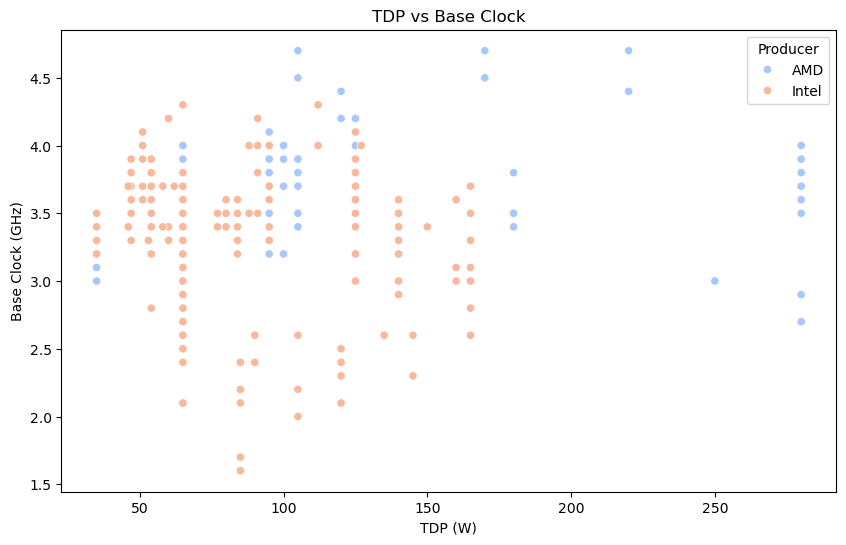

In [17]:
# Scatter plot comparing TDP to base clock speeds
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cpu, x='tdp', y='base_clock', hue='Producer', palette='coolwarm')
plt.title("TDP vs Base Clock")
plt.xlabel("TDP (W)")
plt.ylabel("Base Clock (GHz)")
plt.legend(title='Producer', loc='upper right')
plt.show()

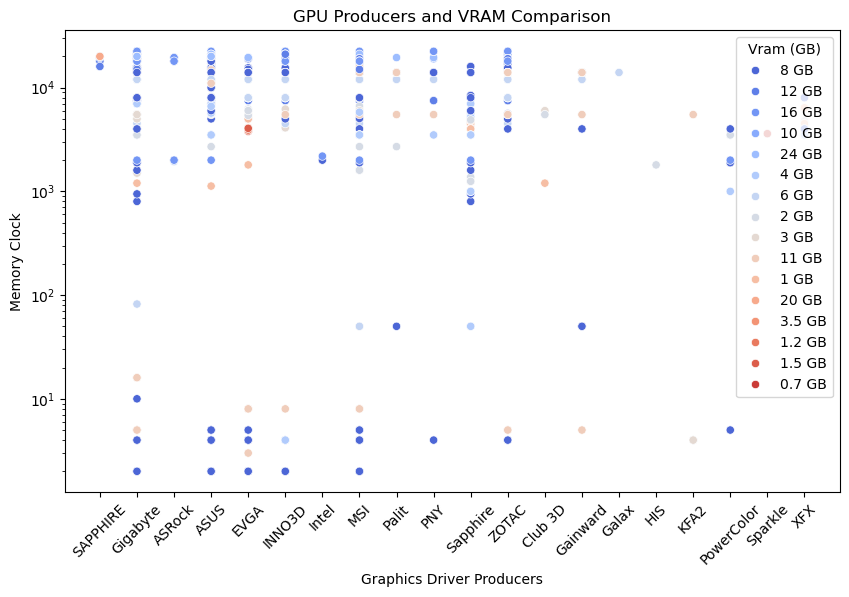

In [18]:
# Plotting GPU producers and VRAM comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu, x='Producer', y='memory_clock', hue='Vram', palette='coolwarm')
plt.title("GPU Producers and VRAM Comparison")
plt.xlabel("Graphics Driver Producers")
plt.ylabel("Memory Clock")
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='Vram (GB)', loc='upper right')
plt.show()


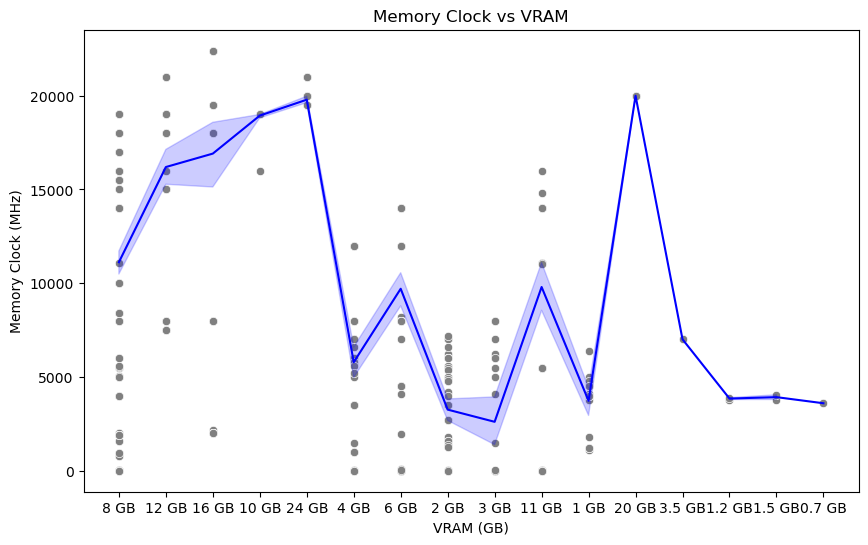

In [19]:
# Plotting memory clock vs VRAM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu, x='Vram', y='memory_clock', color='gray')
sns.lineplot(data=gpu, x='Vram', y='memory_clock', color='blue')
plt.title("Memory Clock vs VRAM")
plt.xlabel("VRAM (GB)")
plt.ylabel("Memory Clock (MHz)")
plt.show()

C:\Users\chill\AppData\Local\Temp\ipykernel_14880\2005549165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gpu, x='Producer', y='boost_clock', palette=['#00C7FD', '#76B900', '#ED1C24'])
C:\Users\chill\AppData\Local\Temp\ipykernel_14880\2005549165.py:3: UserWarning: 
The palette list has fewer values (3) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=gpu, x='Producer', y='boost_clock', palette=['#00C7FD', '#76B900', '#ED1C24'])


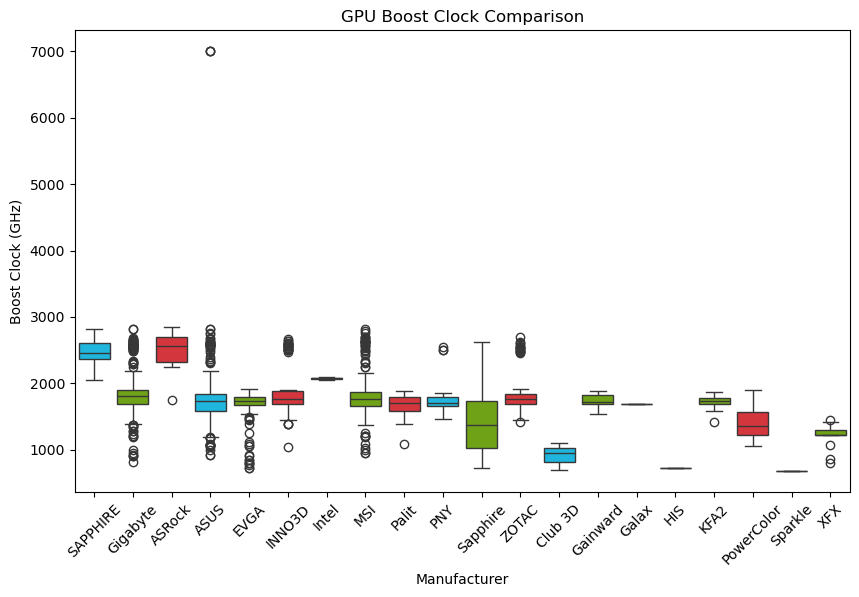

In [20]:
# Plotting boost clock speeds on box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=gpu, x='Producer', y='boost_clock', palette=['#00C7FD', '#76B900', '#ED1C24'])
plt.title("GPU Boost Clock Comparison")
plt.xlabel("Manufacturer")
plt.ylabel("Boost Clock (GHz)")
plt.xticks(rotation=45)
plt.show()


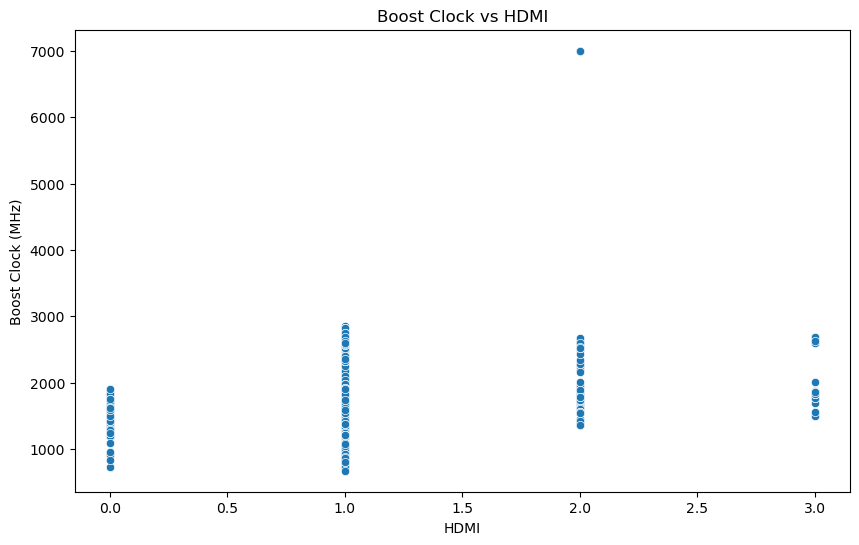

In [21]:
# Plotting boost clock against HDMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu, x='HDMI', y='boost_clock', color="#1f78b4")
plt.title("Boost Clock vs HDMI")
plt.xlabel("HDMI")
plt.ylabel("Boost Clock (MHz)")
plt.show()

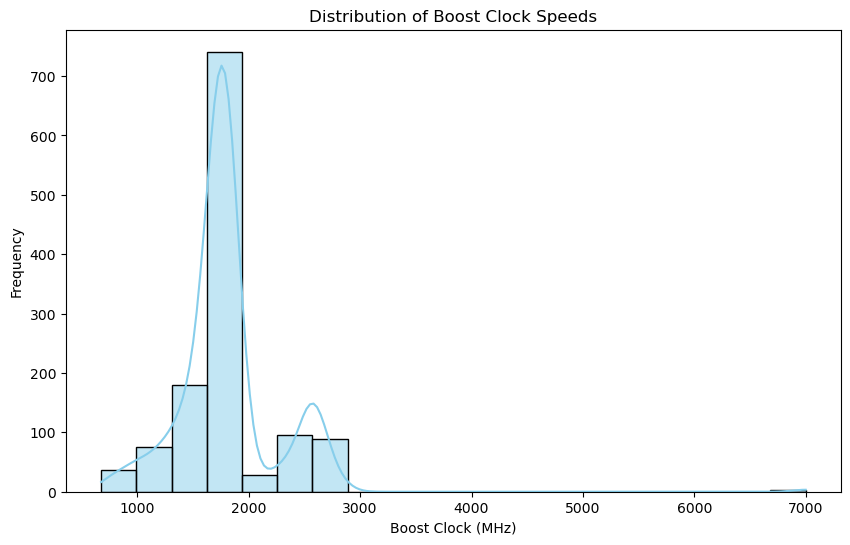

In [22]:
# Histogram of Boost Clock speeds
plt.figure(figsize=(10, 6))
sns.histplot(gpu['boost_clock'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Boost Clock Speeds')
plt.xlabel('Boost Clock (MHz)')
plt.ylabel('Frequency')
plt.show()

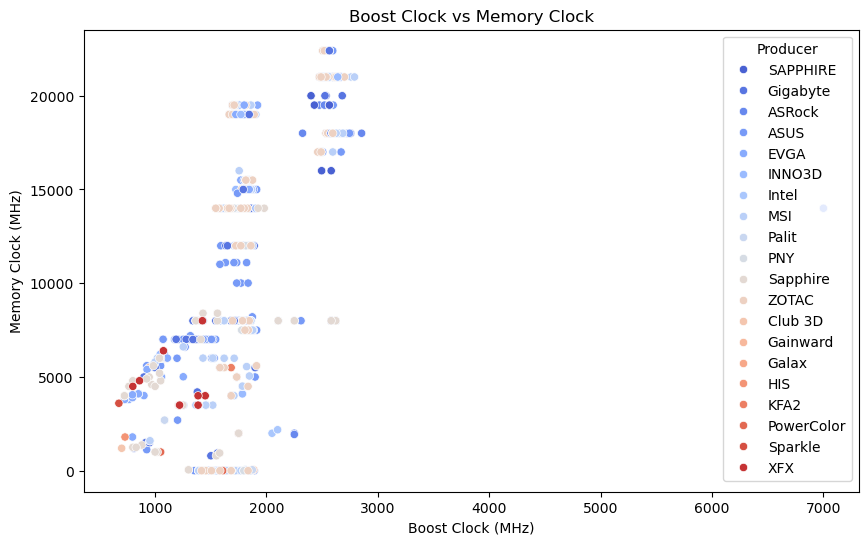

In [23]:
# Scatter plot comparing Boost Clock to Memory Clock
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu, x='boost_clock', y='memory_clock', hue='Producer', palette='coolwarm')
plt.title('Boost Clock vs Memory Clock')
plt.xlabel('Boost Clock (MHz)')
plt.ylabel('Memory Clock (MHz)')
plt.legend(title='Producer', loc='upper right')
plt.show()


In [28]:
gpu['Vram'] = gpu['Vram'].astype(str).str.extract(r'(\d+)').astype(float)

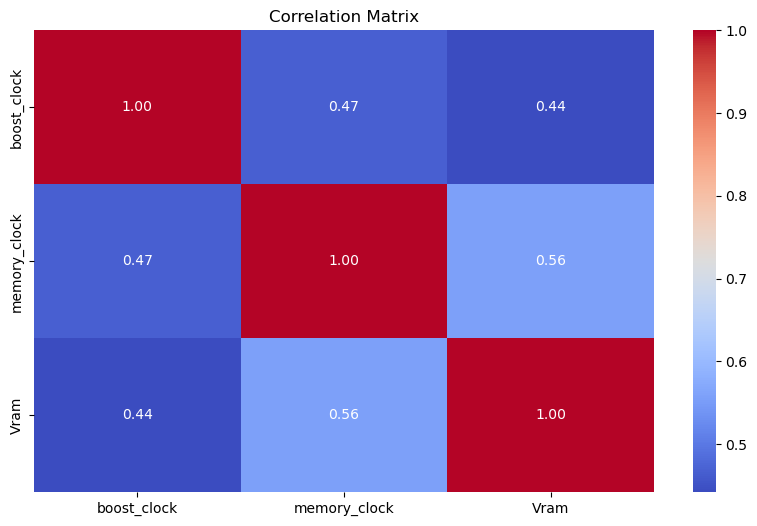

In [29]:
# Heatmap showing the correlation between numeric features
plt.figure(figsize=(10, 6))
corr_matrix = gpu[['boost_clock', 'memory_clock', 'Vram']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [30]:
cpu.head()

,Name,Price,Producer,MPN,EAN,UPC,Base Clock,Turbo Clock,Unlocked Multiplier,Cores,Threads,TDP,Socket,Integrated GPU,Product Page,base_clock,turbo_clock,tdp
0,AMD Ryzen 5 5600X,$158.86 USD,AMD,100-100000065BOX,730143312042,NaN,3.7 GHz,4.6 GHz,True,6,12,65 W,AM4,False,https://www.amazon.ca/dp/B08166SLDF?tag=pckomb...,3.7,4.6,65.0
1,AMD Athlon 3000G,$53.22 USD,AMD,YD3000C6FHBOX,730143311731,NaN,3.5 GHz,NaN,True,2,4,35 W,AM4,Radeon RX Vega 3,https://www.amazon.ca/dp/B0815JGFQ8?tag=pckomb...,3.5,NaN,35.0
2,AMD Ryzen 3 3300X,$150.09 USD,AMD,100-100000159BOX,730143312172,NaN,3.8 GHz,4.3 GHz,True,4,8,65 W,AM4,False,https://www.amazon.ca/dp/B0876YS2T4?tag=pckomb...,3.8,4.3,65.0
3,AMD Ryzen 5 5500,$87.04 USD,AMD,100-100000457BOX,730143314121,NaN,3.6 GHz,4.2 GHz,True,6,12,65 W,AM4,False,https://www.amazon.ca/dp/B09VCJ171S?tag=pckomb...,3.6,4.2,65.0
4,AMD Ryzen 5 5600,$133.46 USD,AMD,100-100000927BOX,730143314190,NaN,3.5 GHz,4.4 GHz,True,6,12,65 W,AM4,False,https://www.amazon.ca/dp/B09VCHR1VH?tag=pckomb...,3.5,4.4,65.0


In [33]:
cpu['Price'] = cpu['Price'].astype(str).str.extract(r'(\d+)').astype(float)

In [34]:
y=cpu['Price']

In [35]:
cpu=cpu.drop(['Price', 'MPN', 'EAN', 'UPC', 'Base Clock', 'Turbo Clock', 'TDP', 'Product Page'], axis=1)

In [36]:
# Encode categorical variables
cpu=cpu.fillna(0)
cpu = pd.get_dummies(cpu, columns=['Name','Producer', 'Unlocked Multiplier', 'Socket', 'Integrated GPU'], drop_first=True).astype(int)

In [37]:
# Select features and target variable
X = cpu

In [38]:
X=X.fillna(0)
y=y.fillna(0)

In [39]:
y.head()

0    158.0
1     53.0
2    150.0
3     87.0
4    133.0
Name: Price, dtype: float64

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# List of models to train
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": xgb.XGBRegressor(),
    "CatBoost Regressor": cb.CatBoostRegressor(verbose=0),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor()
}

In [44]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    results.append({
        "Model": name,
        "Train RMSE": rmse_train,
        "Test RMSE": rmse_test,
        "Train R2": r2_train,
        "Test R2": r2_test
    })
# Convert results to DataFrame
results_df = pd.DataFrame(results)
# Save results to CSV
results_df.to_csv("model_results.csv", index=False)

In [45]:
results_df.head()

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Linear Regression,17.647379,4.465468e+10,0.999148,-4.350451e+15
1,Ridge Regression,123.925087,3.001681e+02,0.957998,8.034245e-01
2,Lasso Regression,134.896345,3.335851e+02,0.950232,7.572196e-01
3,Decision Tree Regressor,17.647378,3.191231e+02,0.999148,7.778140e-01
4,Random Forest Regressor,133.086455,3.472119e+02,0.951559,7.369795e-01


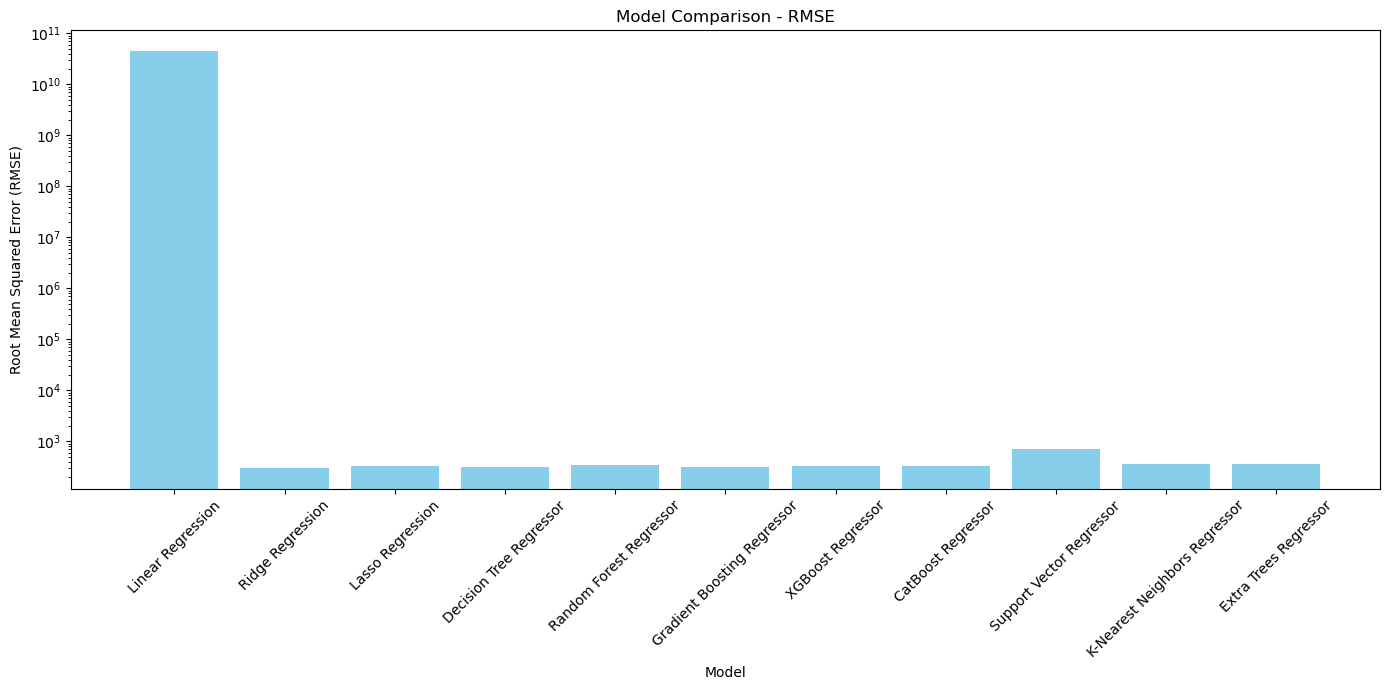

In [46]:
plt.figure(figsize=(14, 7))
plt.bar(results_df['Model'], results_df['Test RMSE'], color='skyblue')
plt.title('Model Comparison - RMSE')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.yscale('log') 
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

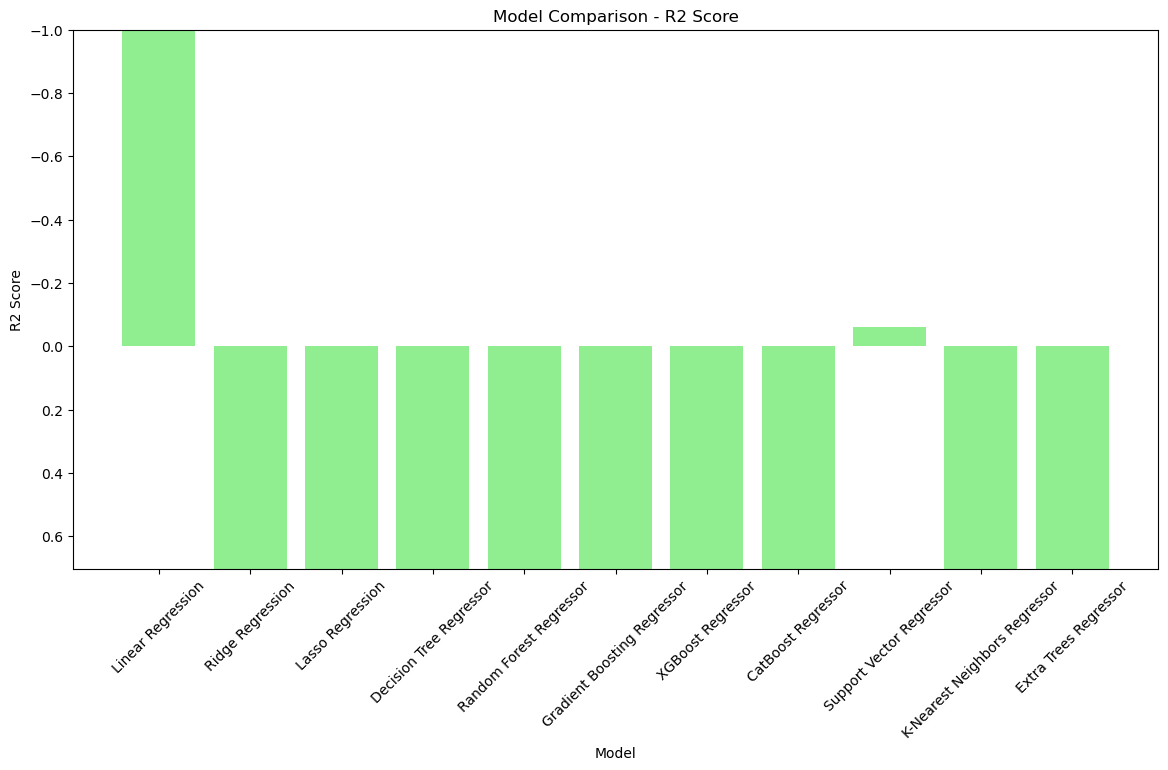

In [47]:
# Plotting R2 scores
plt.figure(figsize=(14, 7))
plt.bar(results_df['Model'], results_df['Test R2'], color='lightgreen')
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(max(results_df['Test R2']) - 0.1, -1) 
plt.show()

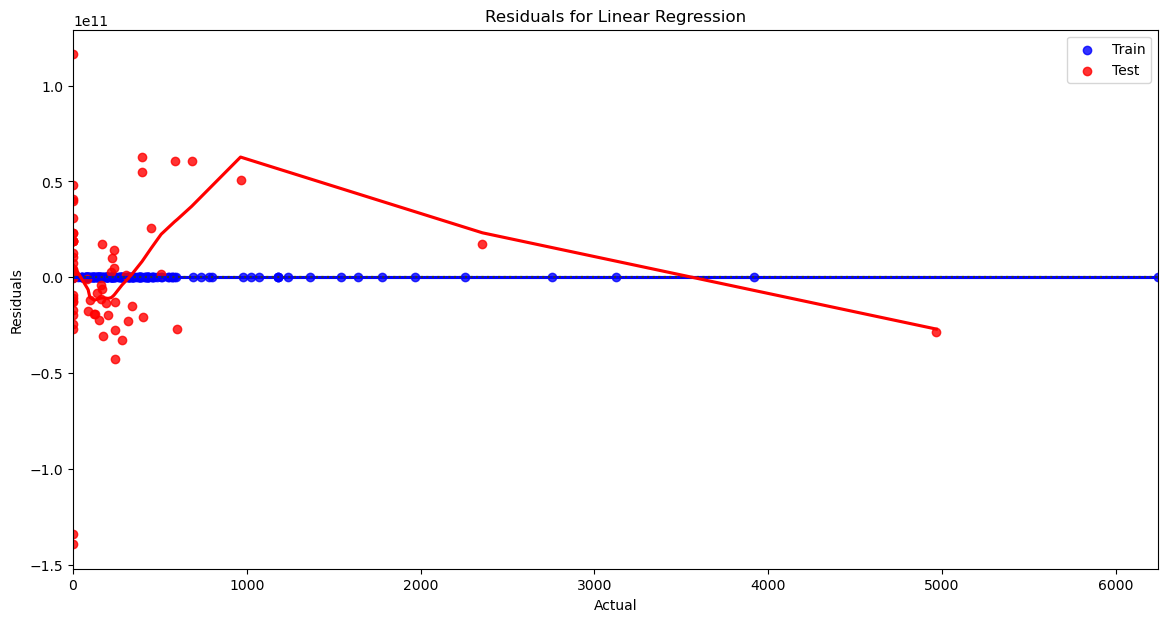

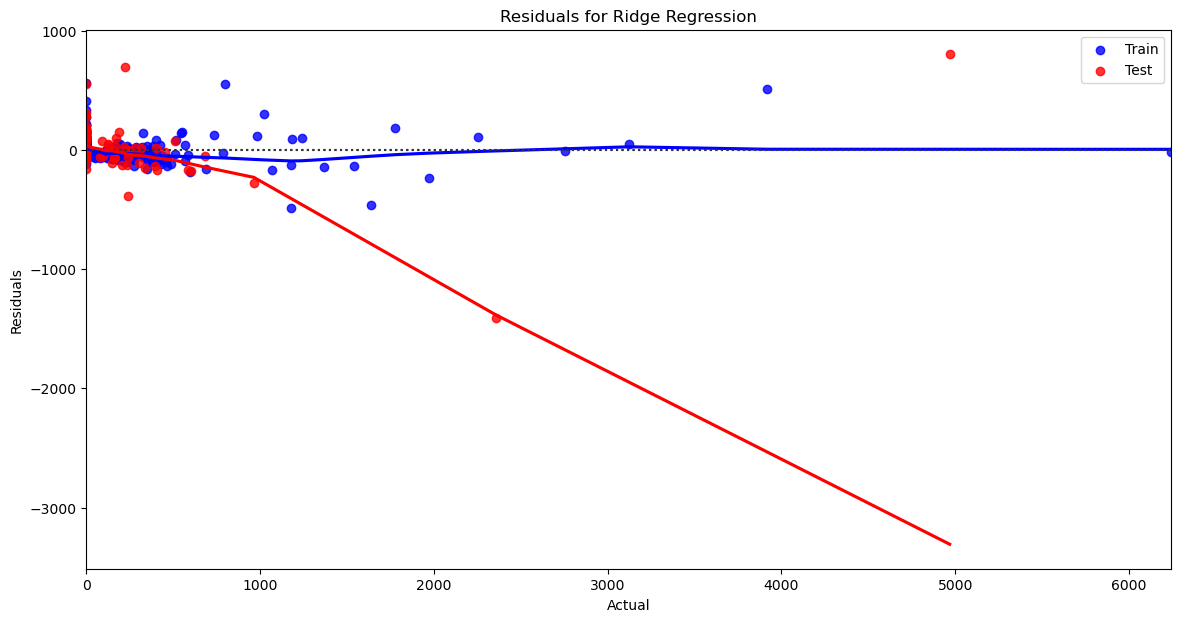

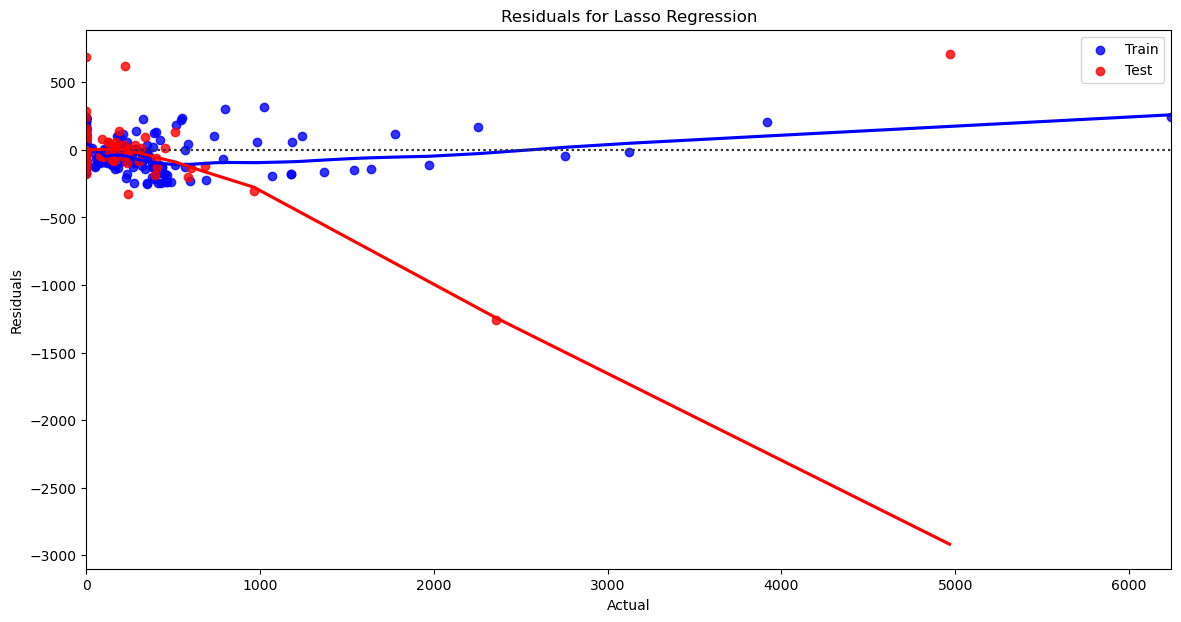

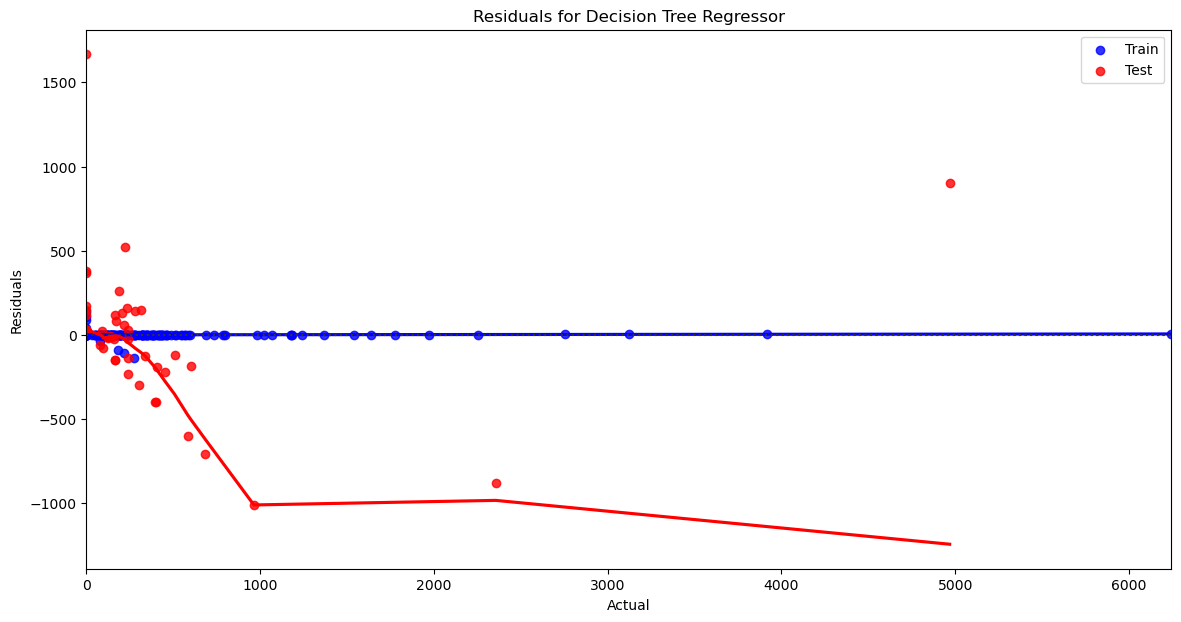

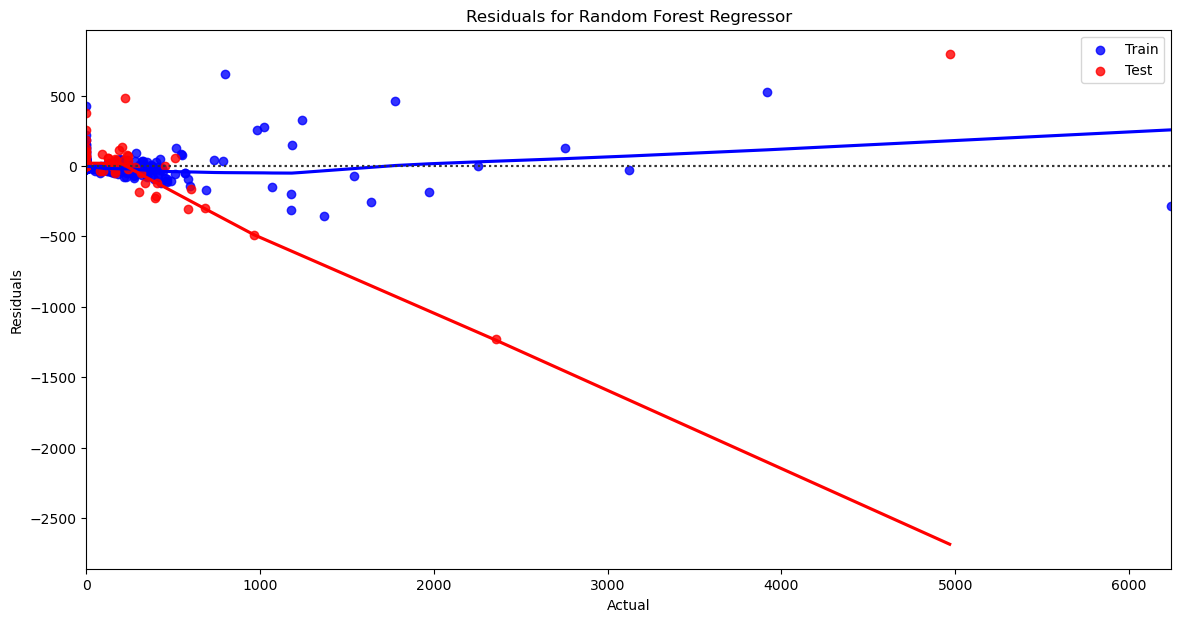

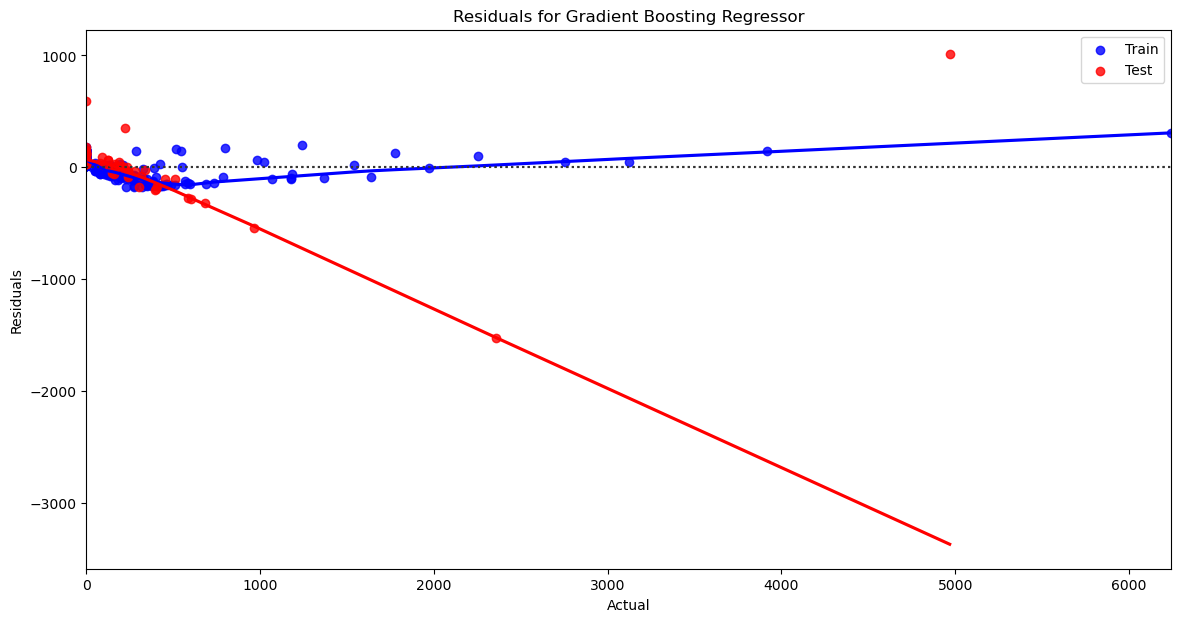

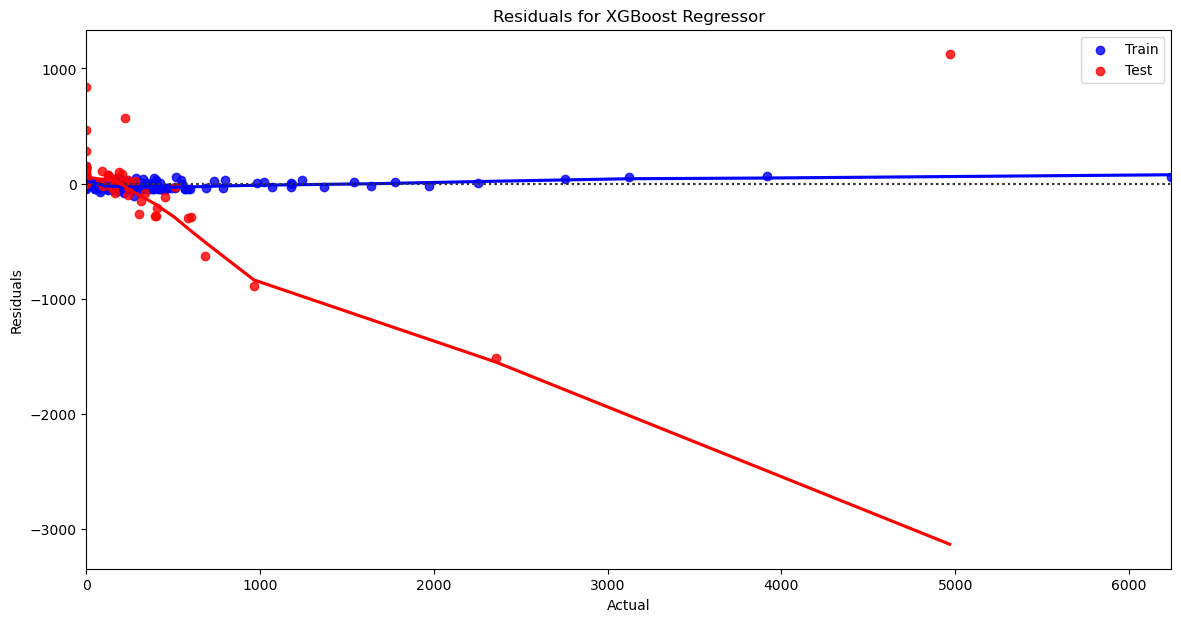

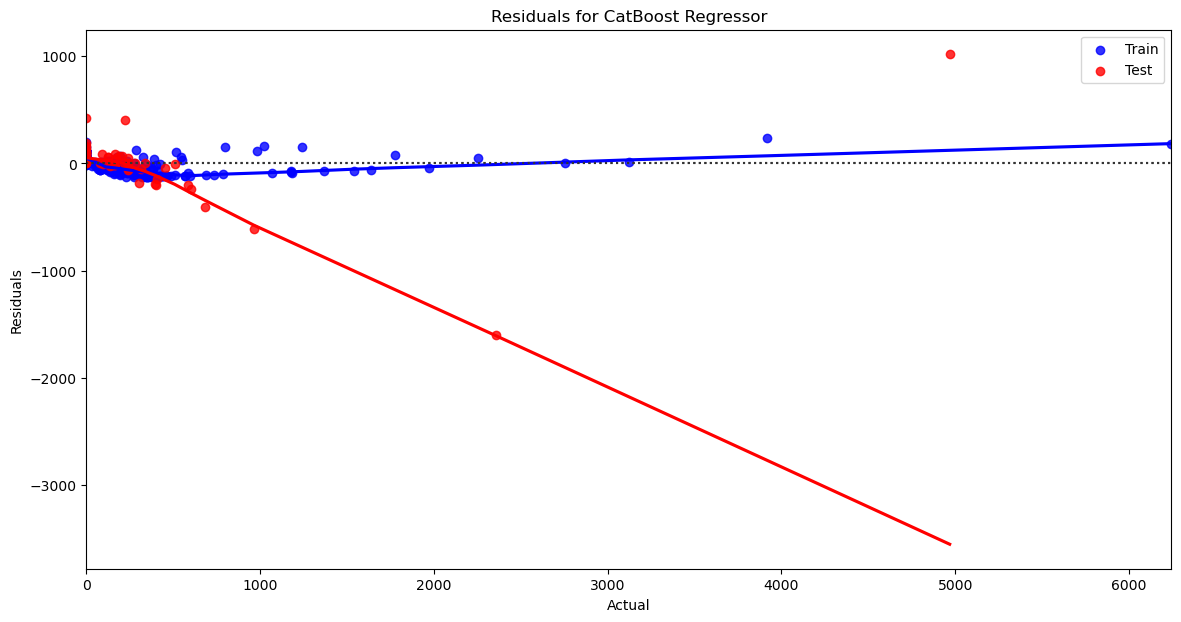

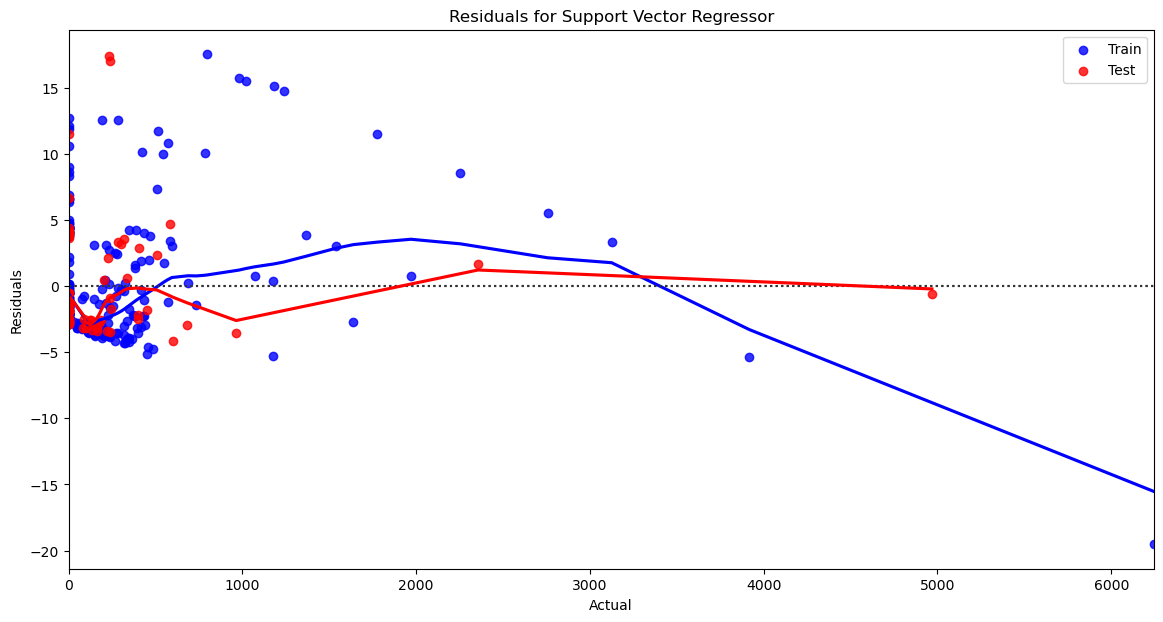

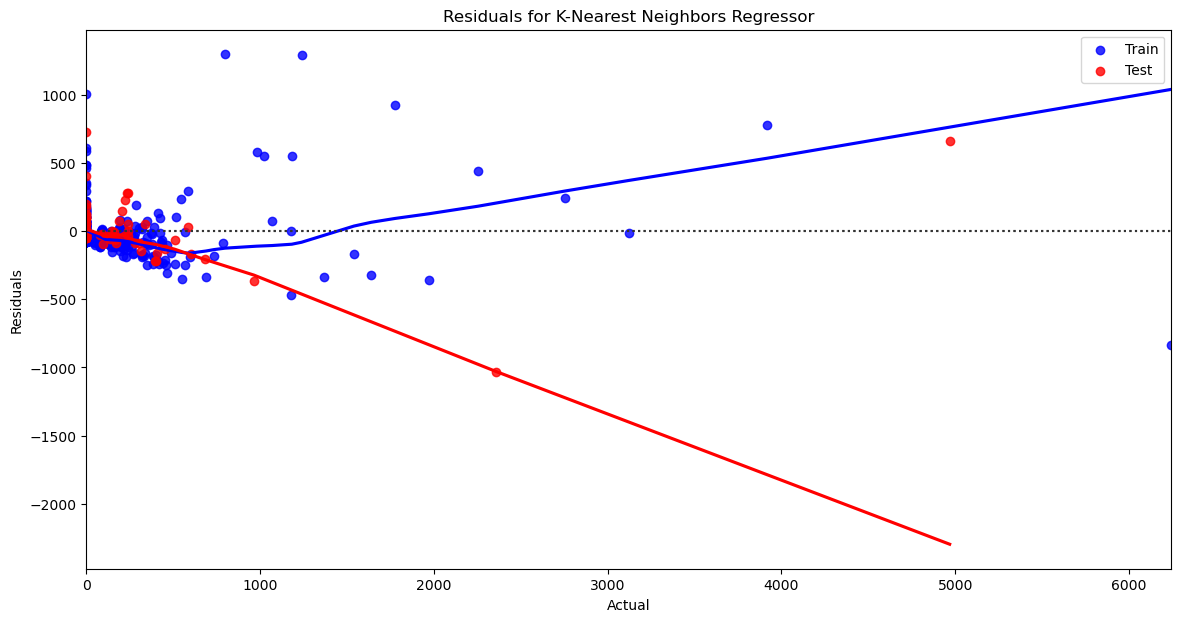

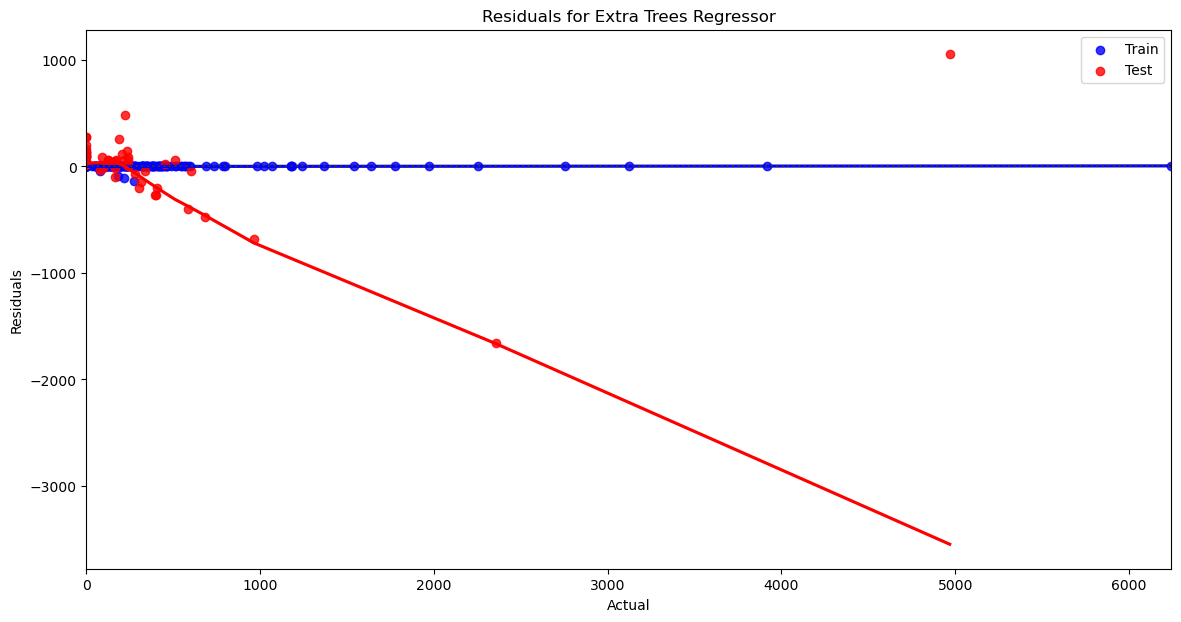

In [48]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # Plot residuals for training data
    plt.figure(figsize=(14, 7))
    sns.residplot(x=y_train, y=y_pred_train, lowess=True, label='Train', color='blue')
    # Plot residuals for testing data
    sns.residplot(x=y_test, y=y_pred_test, lowess=True, label='Test', color='red')
    plt.title(f'Residuals for {name}')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()